### 2. Classification

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc

# ML libraries to construct, use and analyse the trees
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [18]:
train_df = pd.read_csv('./train.dat', sep='\t')
test_df = pd.read_csv('./test.dat', sep='\t')

In [27]:
x_train = train_df[train_df.columns[:-2]]
y_train = train_df[train_df.columns[-1]]
x_test = test_df[test_df.columns[:-2]]
y_test = test_df[test_df.columns[-1]]

### PRIMER MODELO: K-NEIGHBOURS CV

In [30]:
mean_scores = []
std_scores = []

k_values = range(3, 80, 2)

for k in k_values:
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), X=x_train, y=y_train, cv=10)
    mean_scores.append(score.mean())
    std_scores.append(score.std())

print(mean_scores)
print(std_scores)

[0.6670827121474149, 0.6819714950205737, 0.6953968632595862, 0.6985723656747569, 0.7054064046752937, 0.7071178961178364, 0.7122386546603853, 0.711992366867434, 0.7107764327032025, 0.7100411473552388, 0.7085836961059095, 0.70492038881269, 0.7083380046514401, 0.7071155107639095, 0.7090631522452144, 0.7080869461506352, 0.7110167571113364, 0.711260063211879, 0.7119917705289521, 0.7149185997972449, 0.7134539924861351, 0.7151619058977875, 0.7146729083427754, 0.7151583278668971, 0.7149144254278728, 0.715405808336812, 0.7129661876080864, 0.7137014729560498, 0.7127216888305803, 0.7144284095652693, 0.7154064046752936, 0.7144313912576779, 0.715648518098873, 0.715891227860934, 0.7161363229769216, 0.7163784364005009, 0.7153998449519948, 0.7141833144492814, 0.7161363229769216]
[0.01593698062193542, 0.016226510525752674, 0.02920800337251375, 0.025749218805647317, 0.024785864209057488, 0.0243051218254395, 0.02005114504282066, 0.02048766796066427, 0.023855335887078402, 0.022753513822444334, 0.024618717

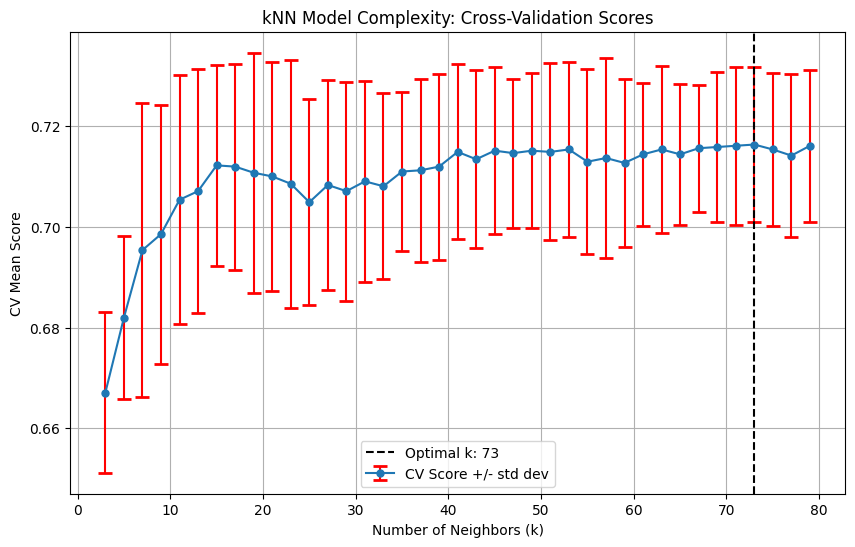

In [31]:
highest_score = max(mean_scores)
optimal_k = mean_scores.index(max(mean_scores))*2 + 3

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='-o', ecolor='r', capsize=5, capthick=2, markersize=5, label='CV Score +/- std dev')
plt.axvline(x=optimal_k, linestyle='--', color='k', label=f'Optimal k: {optimal_k}')

plt.title('kNN Model Complexity: Cross-Validation Scores')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('CV Mean Score')
plt.legend()
plt.grid(True)
plt.show()

## Guardo el valor óptimo de k=23 para pruebas más adelante

### SEGUNDIO MODELO: LOGISTIC REGRESSION CV

In [32]:
mean_scores = []
std_scores = []
parametros = []

penalty_values = ['l1', 'l2']
c_values = [0.01, 0.1, 1, 10]

for p in penalty_values:
    for c in c_values:
        score = cross_val_score(LogisticRegression(penalty=p, C=c, solver='saga', max_iter=1000), X=x_train, y=y_train, cv=10)
        mean_scores.append(score.mean())
        std_scores.append(score.std())
        parametros.append((p, c))

print(mean_scores)
print(std_scores)

[0.7154087900292205, 0.7224831534378914, 0.7217514461208181, 0.7210203351422267, 0.7224873278072634, 0.7212636412427694, 0.7207764327032024, 0.7215081400202756]
[0.01632882994367129, 0.0163822631480848, 0.01718746185990877, 0.017616243393588846, 0.01765117712835231, 0.017105451023771708, 0.017516964148439885, 0.017294640141496006]


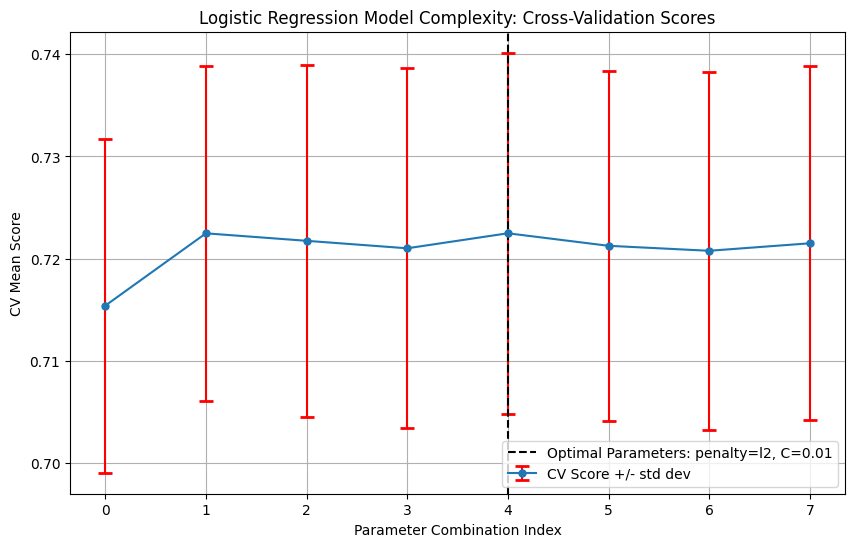

In [33]:
# Encontrar la combinación óptima de parámetros
highest_score = max(mean_scores)
optimal_index = mean_scores.index(highest_score)
optimal_params = parametros[optimal_index]

# Extraer los valores de profundidad máxima y min_samples_split de la combinación óptima
optimal_penalty, optimal_c = optimal_params

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(mean_scores)), mean_scores, yerr=std_scores, fmt='-o', ecolor='r', capsize=5, capthick=2, markersize=5, label='CV Score +/- std dev')
plt.axvline(x=optimal_index, linestyle='--', color='k', label=f'Optimal Parameters: penalty={optimal_penalty}, C={optimal_c}')

plt.title('Logistic Regression Model Complexity: Cross-Validation Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('CV Mean Score')
plt.legend()
plt.grid(True)
plt.show()

# Guardo los parametros óptimos:
# penalty=l2, C=0.01

### TERCER MODELO: NAIVE BAYES CV

In [34]:
# Realizar validación cruzada
scores = cross_val_score(GaussianNB(), X=x_train, y=y_train, cv=10)

# Obtener las puntuaciones medias y las desviaciones estándar
mean_score = scores.mean()
std_score = scores.std()

print("Mean Score:", mean_score)
print("Std Score:", std_score)

# Aqui tan solo obtengo la score sin ajustar parámetros

Mean Score: 0.7168733973403304
Std Score: 0.023684800523052937


### CUARTO MODELO: DECISION TREES CV

In [35]:
mean_scores = []
std_scores = []
parametros = []

depth_values = range(1, 25)
sample_split_values = range(3, 25)

for d in depth_values:
    for s in sample_split_values:
        score = cross_val_score(DecisionTreeClassifier(max_depth=d, min_samples_split=s), X=x_train, y=y_train, cv=10)
        mean_scores.append(score.mean())
        std_scores.append(score.std())
        parametros.append((d, s))

print(mean_scores)
print(std_scores)

[0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.6956348023137934, 0.7019798437593177, 0.7019798437593177, 0.7019798437593177, 0.7019798437593177, 0.7019798437593177, 0.7019798437593177,

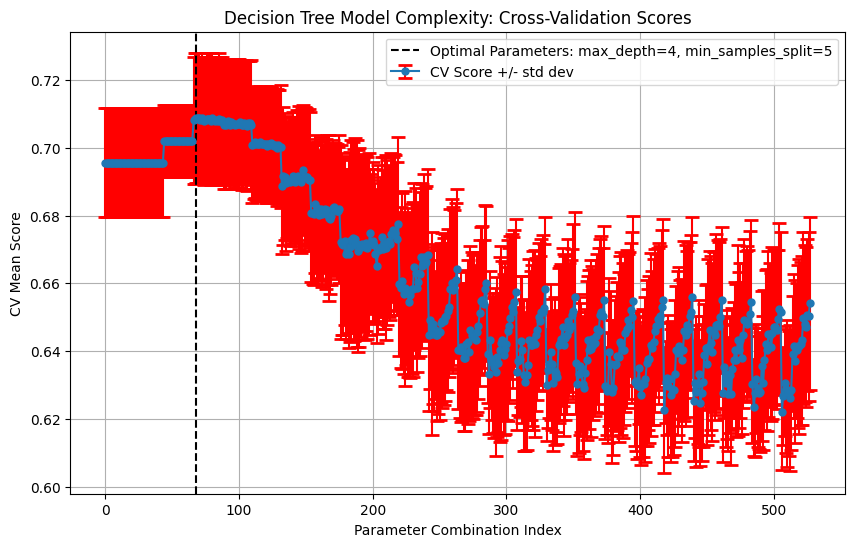

In [36]:
# Encontrar la combinación óptima de parámetros
highest_score = max(mean_scores)
optimal_index = mean_scores.index(highest_score)
optimal_params = parametros[optimal_index]

# Extraer los valores de profundidad máxima y min_samples_split de la combinación óptima
optimal_depth, optimal_samples_split = optimal_params

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(mean_scores)), mean_scores, yerr=std_scores, fmt='-o', ecolor='r', capsize=5, capthick=2, markersize=5, label='CV Score +/- std dev')
plt.axvline(x=optimal_index, linestyle='--', color='k', label=f'Optimal Parameters: max_depth={optimal_depth}, min_samples_split={optimal_samples_split}')

plt.title('Decision Tree Model Complexity: Cross-Validation Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('CV Mean Score')
plt.legend()
plt.grid(True)
plt.show()

# Parece que funciona bien en configuraciones de parametros bajas, y segun aumenta mucho 
# el min_samples_split tiende al underfitting, con malos resultados
# Por lo que guardo los valores max_depth=5 y min_samples_split=8

### QUINTO MODELO: BAGGING CV

In [37]:
mean_scores = []
std_scores = []
parametros = []

n_values = range(50, 300, 50)
features_values = [0.1, 0.3, 0.5, 0.7, 0.9]

for n in n_values:
    for f in features_values:
        score = cross_val_score(BaggingClassifier(n_estimators=n, max_features=f), X=x_train, y=y_train, cv=10)
        mean_scores.append(score.mean())
        std_scores.append(score.std())
        parametros.append((n, f))

print(mean_scores)
print(std_scores)

[0.7066211461625619, 0.6817419047051105, 0.7036961059097143, 0.7080845607967083, 0.707105969348202, 0.7063730693541654, 0.6934426620549824, 0.70955334247719, 0.7078406583576837, 0.7046675412964399, 0.6963700876617569, 0.6978376766652753, 0.7134545888246168, 0.7137032619714949, 0.7083266742202874, 0.701255888842507, 0.6993070546842388, 0.710525970540879, 0.7176057009958853, 0.7078406583576837, 0.7029602242232691, 0.6990613632297691, 0.7146758900351838, 0.7117430973820741, 0.7088144790983362]
[0.012933589671351995, 0.029194593773536524, 0.018714122943505843, 0.015649224162614307, 0.022389670919895015, 0.019149458618231623, 0.01704359171538579, 0.020046734408394502, 0.020157137075461736, 0.020794922274364573, 0.01975833075648228, 0.020130066517676546, 0.021807595500535445, 0.020684296333902938, 0.017540493964601136, 0.018741203041878967, 0.022492152643556217, 0.022963914566776638, 0.01847633989685292, 0.01909766270214001, 0.017212323328639943, 0.02286380064514649, 0.01980877992755433, 0.0

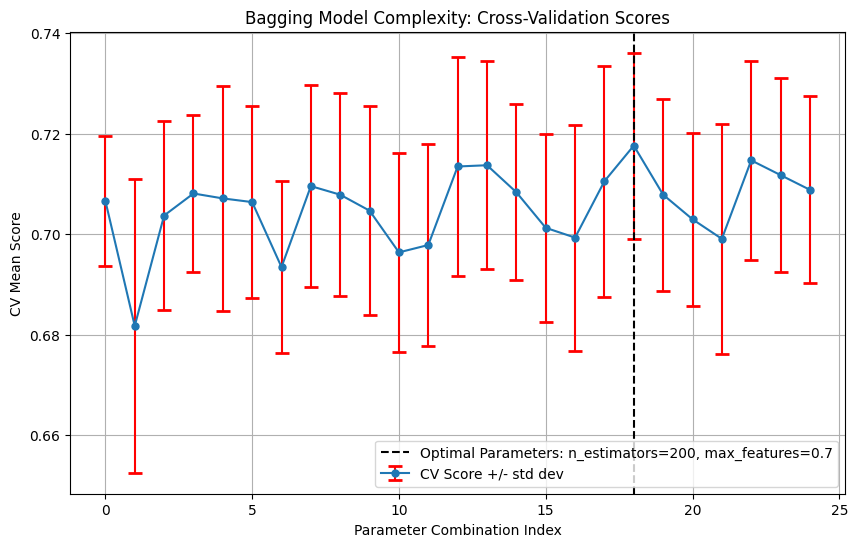

In [38]:
highest_score = max(mean_scores)
optimal_index = mean_scores.index(highest_score)
optimal_params = parametros[optimal_index]

# Extraer los valores de n_estimators y max_features de la combinación óptima
optimal_n_estimators, optimal_max_features = optimal_params

plt.figure(figsize=(10, 6))
plt.errorbar(range(len(mean_scores)), mean_scores, yerr=std_scores, fmt='-o', ecolor='r', capsize=5, capthick=2, markersize=5, label='CV Score +/- std dev')
plt.axvline(x=optimal_index, linestyle='--', color='k', label=f'Optimal Parameters: n_estimators={optimal_n_estimators}, max_features={optimal_max_features}')

plt.title('Bagging Model Complexity: Cross-Validation Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('CV Mean Score')
plt.legend()
plt.grid(True)
plt.show()

# Guardo los parametros óptimos:
# n_estimators=100, max_features=0.5

### SEXTO MODELO: RANDOM FOREST CV

In [39]:
mean_scores = []
std_scores = []
parametros = []

n_values = range(50, 300, 50)
features_values = [0.1, 0.3, 0.5, 0.7, 0.9]

for n in n_values:
    for f in features_values:
        score = cross_val_score(RandomForestClassifier(n_estimators=n, max_features=f), X=x_train, y=y_train, cv=10)
        mean_scores.append(score.mean())
        std_scores.append(score.std())
        parametros.append((n, f))

print(mean_scores)
print(std_scores)

[0.7105211998330252, 0.7083332339435863, 0.707597948595623, 0.7115033693124218, 0.706622935178007, 0.7190589778758423, 0.7129697656389766, 0.7114968095891228, 0.7061327449460313, 0.7085699803208301, 0.718827598544934, 0.7146764863736657, 0.7117472717514461, 0.7105247778639155, 0.7044212535034886, 0.7215087363587571, 0.7180935058739341, 0.7090601705528059, 0.7083290595742143, 0.7049126364124276, 0.7178460254040193, 0.7180929095354521, 0.711262448565806, 0.7119881924980619, 0.7105247778639155]
[0.019324545002906847, 0.02122142411097066, 0.01648739945201825, 0.01977205376955933, 0.02311599698641013, 0.020606109981942494, 0.019518465227858914, 0.01445033190675029, 0.023904266563404174, 0.0164679997241098, 0.02283844031386787, 0.01701134085546556, 0.022013833146560476, 0.01686774159884959, 0.017448720535428616, 0.02104963219174031, 0.02090358158389043, 0.01740452043765981, 0.01477528110457083, 0.014889082950181112, 0.015749236574847367, 0.019338772235783088, 0.021475484145662083, 0.01955914

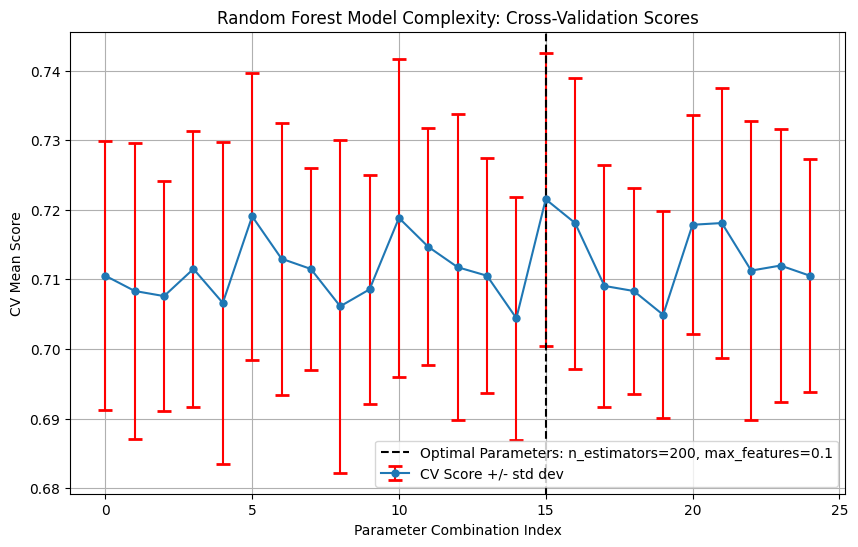

In [50]:
highest_score = max(mean_scores)
optimal_index = mean_scores.index(highest_score)
optimal_params = parametros[optimal_index]

# Extraer los valores de profundidad máxima y min_samples_split de la combinación óptima
optimal_n_estimators_rf, optimal_max_features_rf = optimal_params

plt.figure(figsize=(10, 6))
plt.errorbar(range(len(mean_scores)), mean_scores, yerr=std_scores, fmt='-o', ecolor='r', capsize=5, capthick=2, markersize=5, label='CV Score +/- std dev')
plt.axvline(x=optimal_index, linestyle='--', color='k', label=f'Optimal Parameters: n_estimators={optimal_n_estimators_rf}, max_features={optimal_max_features_rf}')

plt.title('Random Forest Model Complexity: Cross-Validation Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('CV Mean Score')
plt.legend()
plt.grid(True)
plt.show()

# Guardo los parametros óptimos:
# n_estimators=200, max_features=0.3

### SEPTIMO MODELO: SVM CV

Al ver los largos tiempos de ejecución de CV con este modelo decidí investigar la documentación de sklearn, para descubrir que escala de manera cudrática con los datos y no es viable entrenarlo con muchos datos, como es el caso. Por lo que dejo el código comentado y no voy a utilizar este modelo

In [41]:
"""mean_scores = []
std_scores = []
parametros = []

kernel_values = ['linear', 'poly', 'rbf']

for k in kernel_values:
    score = cross_val_score(SVC(kernel=k), X=x_train, y=y_train, cv=10)
    mean_scores.append(score.mean())
    std_scores.append(score.std())
    parametros.append(k)

print(mean_scores)
print(std_scores)"""

"mean_scores = []\nstd_scores = []\nparametros = []\n\nkernel_values = ['linear', 'poly', 'rbf']\n\nfor k in kernel_values:\n    score = cross_val_score(SVC(kernel=k), X=x_train, y=y_train, cv=10)\n    mean_scores.append(score.mean())\n    std_scores.append(score.std())\n    parametros.append(k)\n\nprint(mean_scores)\nprint(std_scores)"

### OCTAVO MODELO: LDA CV

In [42]:
# Realizar validación cruzada
scores = cross_val_score(LinearDiscriminantAnalysis(), X=x_train, y=y_train, cv=10)

# Obtener las puntuaciones medias y las desviaciones estándar
mean_score = scores.mean()
std_score = scores.std()

print("Mean Score:", mean_score)
print("Std Score:", std_score)


Mean Score: 0.7217508497823365
Std Score: 0.016880422523982697


### NOVENO MODELO: QDA CV

In [43]:
scores = cross_val_score(QuadraticDiscriminantAnalysis(), X=x_train, y=y_train, cv=10)

# Obtener las puntuaciones medias y las desviaciones estándar
mean_score = scores.mean()
std_score = scores.std()

print("Mean Score:", mean_score)
print("Std Score:", std_score)

Mean Score: 0.7029536644999702
Std Score: 0.021961668104423973


## COMPARATIVAS ENTRE MODELOS

### Ahora voy a entrenar todos los modelos entrenados previamente con sus parámetros óptimos para hacer una comparativa entre los mismos

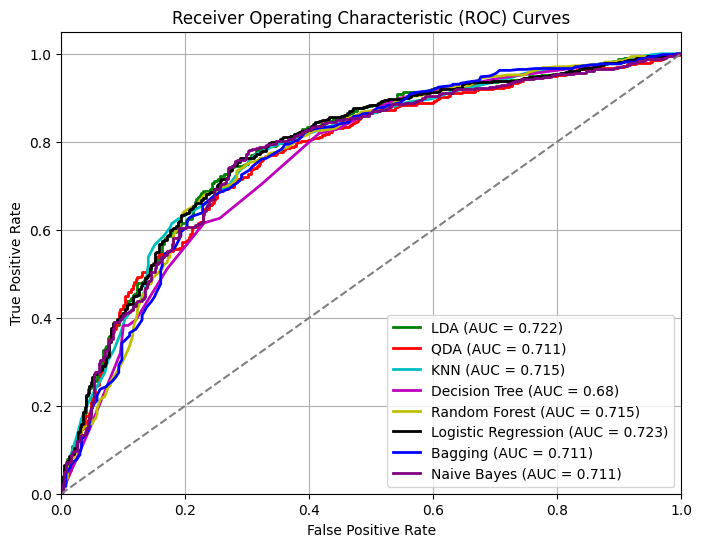

In [49]:
# Crear modelos con parámetros óptimos
classifiers = [
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier(n_neighbors=optimal_k),
    DecisionTreeClassifier(max_depth=optimal_depth, min_samples_split=optimal_samples_split),
    RandomForestClassifier(n_estimators=optimal_n_estimators_rf, max_features=optimal_max_features_rf),
    LogisticRegression(penalty=optimal_penalty, C=optimal_c, solver='saga'),
    BaggingClassifier(n_estimators=optimal_n_estimators, max_features=optimal_max_features),
    GaussianNB()
]

colors = ['g', 'r', 'c', 'm', 'y', 'k', 'b', 'purple']
labels = ['LDA', 'QDA', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Bagging', 'Naive Bayes']

plt.figure(figsize=(8, 6))

for i, classifier in enumerate(classifiers):
    classifier.fit(x_train, y_train)
    
    if hasattr(classifier, "predict_proba"):
        y_score = classifier.predict_proba(x_test)[:, 1]
    else:
        y_score = classifier.decision_function(x_test)
    
    y_pred = classifier.predict(x_test)

    # ROC curve y el área bajo la curva (AUC)
    fpr, tpr, _ = roc_curve(y_test, y_score)

    accuracy = round(accuracy_score(y_test, y_pred), 3)
    
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{labels[i]} (AUC = {accuracy})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)

# Mostrar el gráfico
plt.show()

#### Observando la ROC curve de todos los modelos entrenados se puede observar que los modelos que mejor puntuación obtienen son LDA y Random Forest, seguidos de cerca por Bagging y Naive Bayes

### Codigo extra para comprobar la feature importance

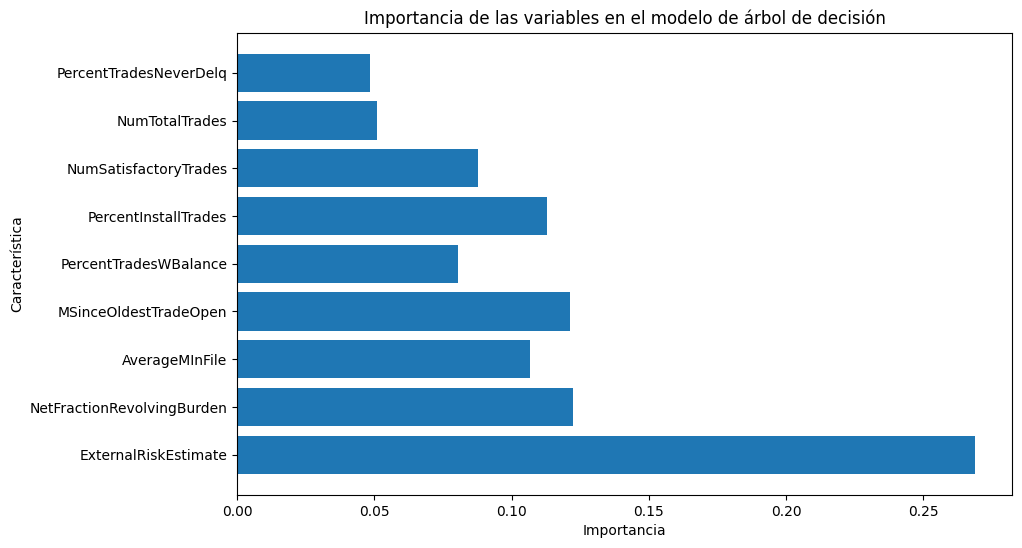

In [45]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

importances = model.feature_importances_

feature_names = x_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las variables en el modelo de árbol de decisión')
plt.show()